In [13]:
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder, StandardScaler

ModuleNotFoundError: No module named 'sklearn'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading the dataset
data = pd.read_excel("C:/Users/mukes/Downloads/Final/Final Ass/data_report4.xlsx")

# Defining class variables
class_variable = 'frisked'  # Example class variable

# Checking if the class variable exists in the dataframe
if class_variable in data.columns:
    # Encoding categorical class variable using Label Encoding
    label_encoder = LabelEncoder()
    data[class_variable] = label_encoder.fit_transform(data[class_variable])
else:
    raise KeyError(f"{class_variable} is not a column in the dataframe")

# Removing variables that are not needed
columns_to_drop = ['datestop']  # Add other columns as necessary
data = data.drop(columns=columns_to_drop)

# Describing the final dataset
# For classification:
#   - Encoded categorical variables ('race', 'sex', 'city')
#   - Scaled numerical variable ('age')
# Scaling and Normalizing the numerical variable
numerical_columns = ['age']  # Add other numerical columns as necessary
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Splitting the dataset into training and testing sets (not mentioned in the tasks, but added for completeness)
X = data.drop(columns=[class_variable])
y = data[class_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\mukes\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\mukes\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\mukes\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\mukes\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


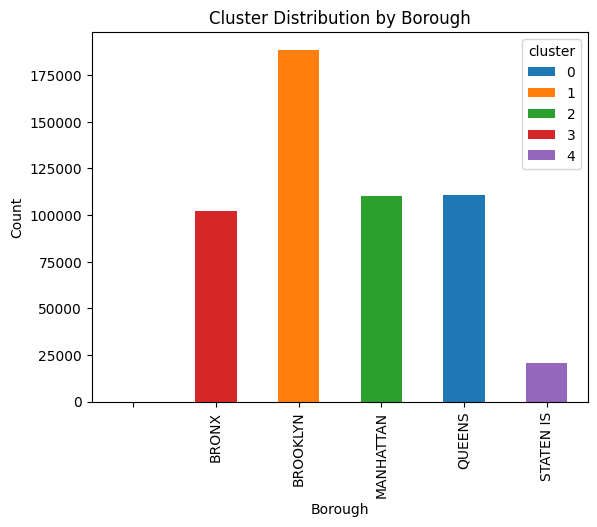

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Loading the dataset
data = pd.read_excel('data_report4.xlsx')

# One-hot encode the categorical variables, excluding 'city'.
categorical_variables = ['race', 'sex', 'frisked', 'pistol', 'pf_hcuff']
one_hot_encoder = OneHotEncoder()
encoded_categorical = one_hot_encoder.fit_transform(data[categorical_variables]).toarray()
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_variables)
encoded_data = pd.DataFrame(encoded_categorical, columns=encoded_feature_names)

# Normalizing 'age' since it's a numerical feature
scaler = StandardScaler()
data['scaled_age'] = scaler.fit_transform(data[['age']])

# Combining the one-hot encoded columns with the 'scaled_age' column
combined_data = pd.concat([data[['scaled_age']], encoded_data], axis=1)

# One-hot encode the 'city' column for clustering
city_one_hot = pd.get_dummies(data['city'])
combined_data_with_city = pd.concat([combined_data, city_one_hot], axis=1)

# Performing clustering using only the city one-hot encoded features
kmeans = KMeans(n_clusters=5, random_state=42)
combined_data_with_city['cluster'] = kmeans.fit_predict(city_one_hot)

# Adding the cluster back to the original data to make sense of it
data['cluster'] = combined_data_with_city['cluster']


# If you just want to see the distribution of clusters across different boroughs:
borough_counts = data.groupby(['city', 'cluster']).size().unstack(fill_value=0)
borough_counts.plot(kind='bar', stacked=True)
plt.title('Cluster Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

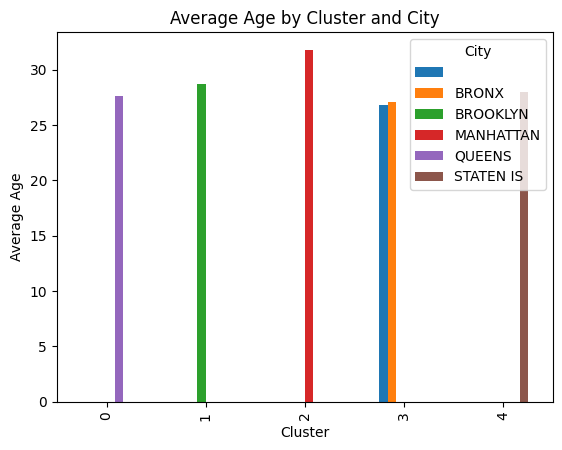

<Figure size 1200x600 with 0 Axes>

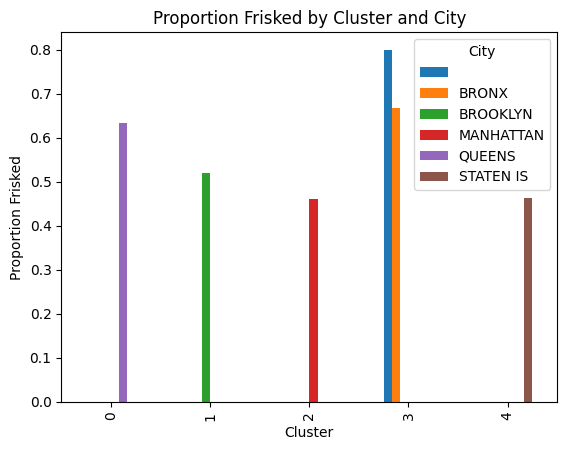

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_excel('data_report4.xlsx')

# Encode 'frisked' as a binary variable for aggregation purposes
data['frisked'] = data['frisked'].map({'Y': 1, 'N': 0})

# One-hot encode the 'city' column for clustering
one_hot_encoder = OneHotEncoder(sparse=False)
city_encoded = one_hot_encoder.fit_transform(data[['city']])
city_feature_names = one_hot_encoder.get_feature_names_out(['city'])
city_encoded_df = pd.DataFrame(city_encoded, columns=city_feature_names)

# Performing clustering using only the city one-hot encoded features
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(city_encoded)

# Calculating mean age and frisked proportion by cluster and city
cluster_stats = data.groupby(['city', 'cluster']).agg({
    'age': 'mean',
    'frisked': 'mean'
}).reset_index()

# Pivoting this data to have cities as columns, for easy plotting
cluster_stats_pivot = cluster_stats.pivot(index='cluster', columns='city', values=['age', 'frisked'])

# Plotting the average age by cluster and city
plt.figure(figsize=(12, 6))
cluster_stats_pivot['age'].plot(kind='bar')
plt.title('Average Age by Cluster and City')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.legend(title='City')
plt.show()

# Plotting the proportion of frisked by cluster and city
plt.figure(figsize=(12, 6))
cluster_stats_pivot['frisked'].plot(kind='bar')
plt.title('Proportion Frisked by Cluster and City')
plt.xlabel('Cluster')
plt.ylabel('Proportion Frisked')
plt.legend(title='City')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-9a36478aac6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_location_data['location_cluster'] = kmeans.fit_predict(crime_location_data)


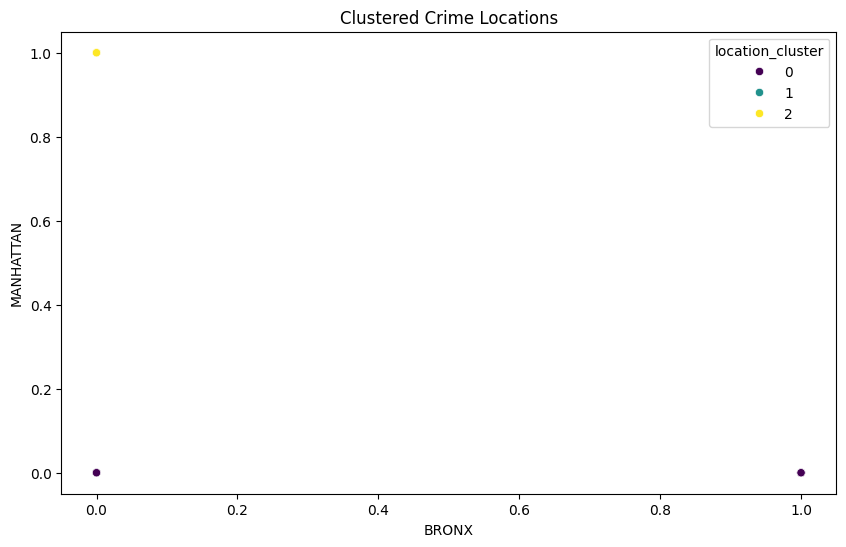

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

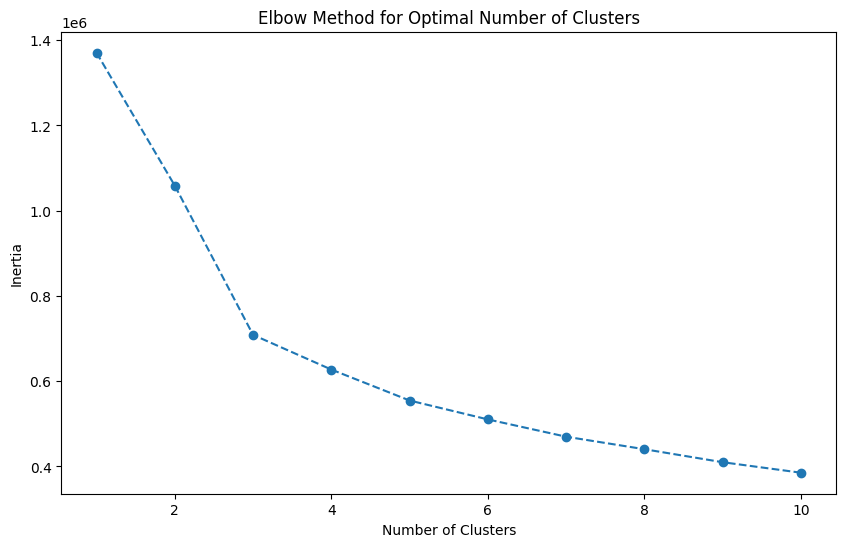

Silhouette Score: 0.3445526960026389
Adjusted Rand Index: 0.0018496679629946603


In [ ]:
# Performing one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data)

# Clustering the location for a crime of your choice
crime_location_data = data_encoded[['city_BRONX', 'city_MANHATTAN', 'city_BROOKLYN']]
kmeans = KMeans(n_clusters=3, random_state=42)
crime_location_data['location_cluster'] = kmeans.fit_predict(crime_location_data)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crime_location_data, x='city_BRONX', y='city_MANHATTAN', hue='location_cluster', palette='viridis')
plt.title('Clustered Crime Locations')
plt.xlabel('BRONX')
plt.ylabel('MANHATTAN')
plt.show()

# Clustering stopped people by reasons for stop
stopped_reason_data = data_encoded.drop(columns=['city_BRONX', 'city_MANHATTAN', 'city_BROOKLYN'])  # Drop city columns for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
stopped_reason_data['reason_cluster'] = kmeans.fit_predict(stopped_reason_data)

# Determining a suitable number of clusters for each method
# Using the elbow method to determine the optimal number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(stopped_reason_data)
    inertia.append(kmeans.inertia_)

# Visualize the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Use internal validation measures to describe and compare the clusters
# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(stopped_reason_data, stopped_reason_data['reason_cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
adjusted_rand_idx = adjusted_rand_score(stopped_reason_data[class_variable], stopped_reason_data['reason_cluster'])
print(f"Adjusted Rand Index: {adjusted_rand_idx}")
